In [16]:
import pandas as pd
data = pd.read_csv('data/training_data_fall2024.csv')

from sklearn.preprocessing import StandardScaler

# 选择天气相关特征
weather_features = ['summertime','temp', 'dew', 'humidity', 'snowdepth', 'windspeed', 'cloudcover', 'visibility']

# 标准化
scaler = StandardScaler()
weather_scaled = scaler.fit_transform(data[weather_features])


In [17]:
from sklearn.cluster import KMeans

# 初始化K-Means，聚类数设为2
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(weather_scaled)

# 获取聚类标签
data['weather_cluster'] = kmeans.labels_

# 查看聚类结果
print(data['weather_cluster'].value_counts())


weather_cluster
0    487
3    460
2    370
1    283
Name: count, dtype: int64


In [18]:
# 创建聚类中心 DataFrame
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=weather_features)
print(cluster_centers)


   summertime      temp       dew  humidity  snowdepth  windspeed  cloudcover  \
0    0.713893  0.551681  0.882620  0.835271  -0.101439  -0.267663    0.562868   
1   -1.270467 -0.968832 -0.531433  0.708855   0.378833  -0.408917    0.545726   
2   -0.881472 -0.923814 -1.243526 -0.954861  -0.030127   0.557386   -0.351224   
3    0.734828  0.755047  0.392748 -0.552357  -0.101439   0.086615   -0.649139   

   visibility  
0   -0.190213  
1   -0.480654  
2    0.276987  
3    0.274290  


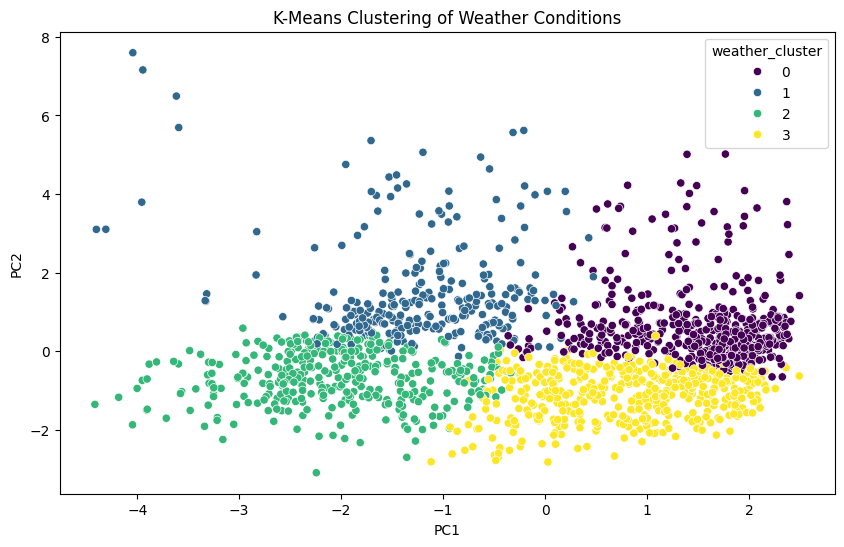

In [19]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
# 初始化 PCA
pca = PCA(n_components=2, random_state=42)
principal_components = pca.fit_transform(weather_scaled)

# 创建 DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['weather_cluster'] = data['weather_cluster']

# 绘制聚类结果
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='weather_cluster', data=pca_df, palette='viridis')
plt.title('K-Means Clustering of Weather Conditions')
plt.show()


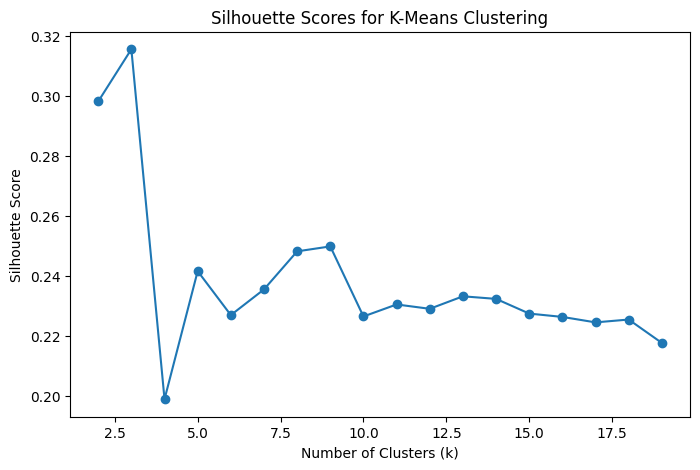

In [24]:
from sklearn.metrics import silhouette_score

# 计算不同聚类数的轮廓系数
sil_scores = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(weather_scaled)
    labels = kmeans.labels_
    sil = silhouette_score(weather_scaled, labels)
    sil_scores.append(sil)

# 绘制轮廓系数
plt.figure(figsize=(8, 5))
plt.plot(range(2 , 20), sil_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K-Means Clustering')
plt.show()


In [25]:
import pandas as pd

# Assuming 'weather_scaled' is the standardized weather features used for clustering
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=weather_features)
print("Cluster Centers (Standardized):")
print(cluster_centers)

# To interpret, inverse transform to original scale
cluster_centers_original = scaler.inverse_transform(cluster_centers)
cluster_centers_original_df = pd.DataFrame(cluster_centers_original, columns=weather_features)
print("\nCluster Centers (Original Scale):")
print(cluster_centers_original_df)


Cluster Centers (Standardized):
    summertime      temp       dew  humidity  snowdepth  windspeed  \
0     0.743907 -0.274712 -0.669259 -0.916143  -0.101439   2.003087   
1     0.743907 -0.303110 -0.713118 -0.947300  -0.031588  -0.190617   
2     0.743907 -0.248916 -0.054217  0.275294  -0.101439  -0.896545   
3    -1.234350 -1.478967 -1.816802 -1.157866   0.398962   1.397308   
4     0.692348  0.932621  0.369126 -0.874750  -0.101439   1.096363   
5     0.688956  0.090945  0.670204  1.397012  -0.101439   0.148866   
6    -1.344254 -1.048495 -1.000535 -0.230547  -0.077690  -0.607752   
7    -1.344254 -1.541026 -1.062596  0.655802  13.147674   1.407942   
8     0.743907 -0.214569  0.190580  0.814459  -0.101439  -0.218784   
9    -1.344254 -1.093403 -0.408883  1.393323   0.132095  -0.344098   
10    0.727594  0.926242  1.099236  0.538500  -0.101439  -0.497672   
11   -1.344254 -1.177547 -0.825051  0.400450  -0.076502  -0.490120   
12    0.743907  0.875199  1.100939  0.643880  -0.101439   

# 111

   holiday  weekday  summertime      temp       dew  humidity    precip  \
0        0        0   -1.344254 -2.419627 -2.269781 -0.537283 -0.209118   
1        0        1   -1.344254 -1.782607 -2.050293 -1.203654 -0.209118   
2        0        1    0.743907  1.262128  1.401656  0.496090 -0.209118   
3        0        0   -1.344254 -1.307542 -1.172340 -0.219564 -0.209118   
4        0        1   -1.344254 -0.379006 -1.910618 -2.370721 -0.209118   

   snowdepth  windspeed  cloudcover  visibility  month_sin  month_cos  \
0  -0.124683   0.414935   -0.999503    0.242212   0.678434   1.227255   
1  -0.124683   1.395045    0.652979    0.242212   0.678434   1.227255   
2  -0.124683  -1.687144    0.512472    0.242212  -1.259495  -0.699517   
3  -0.124683   0.788924   -1.964724    0.242212   0.678434   1.227255   
4  -0.124683  -0.333044   -0.602419    0.242212   1.387764   0.005730   

   day_of_week_sin  day_of_week_cos  hour_of_day_sin  hour_of_day_cos  
0        -1.356549        -0.310979   

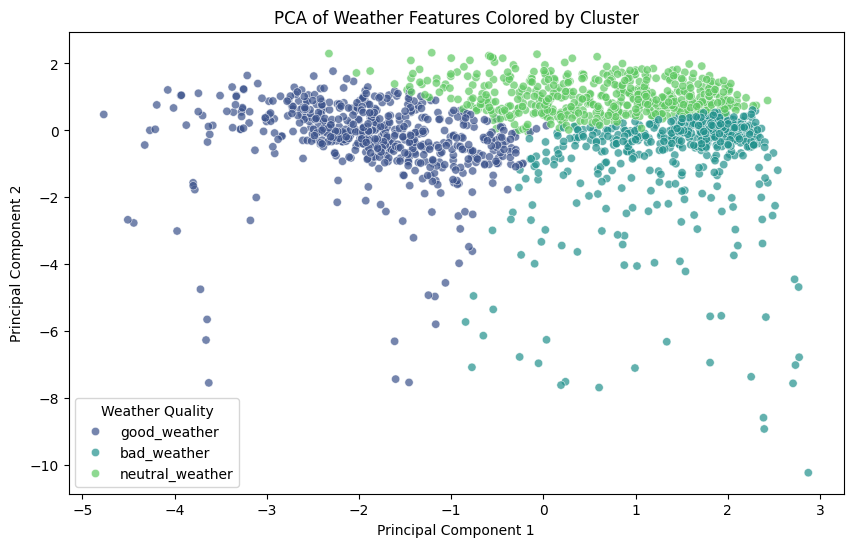

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('data/training_data_fall2024.csv')
def process_time_data_scale(data):
    # Transform cyclical time features
    data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
    data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)

    data['day_of_week_sin'] = np.sin(2 * np.pi * data['day_of_week'] / 7)
    data['day_of_week_cos'] = np.cos(2 * np.pi * data['day_of_week'] / 7)

    data['hour_of_day_sin'] = np.sin(2 * np.pi * data['hour_of_day'] / 24)
    data['hour_of_day_cos'] = np.cos(2 * np.pi * data['hour_of_day'] / 24)

    # Drop original cyclical features
    data = data.drop(columns=['month', 'day_of_week', 'hour_of_day'], axis=1)

    # Select numerical features to scale (excluding 'holiday' and 'weekday')
    numeric_features = data.drop(['holiday', 'weekday'], axis=1).select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # Standardize numerical features
    scaler = StandardScaler()
    numeric_data = pd.DataFrame(scaler.fit_transform(data[numeric_features]),
                                columns=numeric_features,
                                index=data.index)

    # Concatenate scaled numerical features with categorical features
    processed_data = pd.concat([data[['holiday', 'weekday']], numeric_data], axis=1)

    return processed_data, scaler


# 对数变换，减少影响
data = data.drop(columns=['snow',], axis=1)
data['visibility'] = np.log1p(data['visibility'])
data['snowdepth'] = np.log1p(data['snowdepth'])
data['precip'] = np.log1p(data['precip'])
# Apply the processing function
processed_data, scaler = process_time_data_scale(data)

print(processed_data.head())
from sklearn.cluster import KMeans

# Select features for clustering
clustering_features = ['summertime', 'temp', 'dew', 'humidity', 'snowdepth', 'windspeed', 'cloudcover', 'visibility', 'precip']

# Initialize K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit K-Means on the selected features
kmeans.fit(processed_data[clustering_features])

# Assign cluster labels to the data
processed_data['weather_cluster'] = kmeans.labels_

# Display cluster assignments
print(processed_data[['weather_cluster']].head())

# Cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=clustering_features)
print("Cluster Centers (Original Scale):")
print(cluster_centers)

def label_weather_cluster(cluster_label):
    if cluster_label == 0:
        return 'bad_weather'
    elif cluster_label == 1:
        return 'good_weather'
    elif cluster_label == 2:
        return 'neutral_weather'

# Apply labeling
processed_data['weather_quality'] = processed_data['weather_cluster'].apply(label_weather_cluster)

# Display labeled clusters
print(processed_data[['weather_cluster', 'weather_quality']].head())

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize PCA
pca = PCA(n_components=2, random_state=42)
principal_components = pca.fit_transform(processed_data[clustering_features])

# Create DataFrame for PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['weather_cluster'] = processed_data['weather_cluster']
pca_df['weather_quality'] = processed_data['weather_quality']

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='weather_quality', data=pca_df, palette='viridis', alpha=0.7)
plt.title('PCA of Weather Features Colored by Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Weather Quality')
plt.show()

# One-Hot Encode 'weather_quality'
weather_dummies = pd.get_dummies(processed_data['weather_quality'], prefix='weather', drop_first=True)

# Concatenate with the processed data
processed_data = pd.concat([processed_data, weather_dummies], axis=1)

# Define categorical and numerical features
categorical_features = ['holiday', 'weekday'] + list(weather_dummies.columns)
numeric_features = [col for col in processed_data.columns if col not in ['holiday', 'weekday', 'increase_stock', 'weather_cluster', 'weather_quality'] + list(weather_dummies.columns)]

# 将所有布尔类型列转换为整数类型
for col in processed_data.select_dtypes(include=['bool']).columns:
    processed_data[col] = processed_data[col].astype(int)

# Final feature set
X = processed_data[categorical_features + numeric_features].to_numpy().astype(np.float64)

y = data['increase_stock'].map({'low_bike_demand': 0, 'high_bike_demand': 1}).to_numpy().reshape(-1, 1)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train_bal, y_train_bal = X_train, y_train


In [13]:
from scripts.evaluation import evaluate_model
from scripts.hyperparameter_tuning import tune_random_forest_rs
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                    )

"""Choose whether we need to balance the dataset"""
# X_train_bal, y_train_bal = balance_classes(X_train, y_train)

X_train_bal, y_train_bal = X_train, y_train

# """试图使用LDA正则化，甚至降低了精度的作用"""
# lda = LinearDiscriminantAnalysis()
# X_train_bal_lda = lda.fit_transform(X_train_bal, y_train_bal.ravel())
# X_test_lda = lda.transform(X_test)


# Hyperparameter tuning for Random Forest
print("Tuning Random Forest...")
best_rf = tune_random_forest_rs(X_train_bal, y_train_bal)
# Evaluate the tuned Random Forest model
accuracy, f1, report = evaluate_model(best_rf, X_test, y_test)
print(f"Tuned Random Forest Accuracy: {accuracy:.2f}")
print(f"Tuned Random Forest F1 Score: {f1:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_matrix(y_test, best_rf.predict(X_test)))
print(f"\n\n\n\n")


Tuning Random Forest...


c:\ProgramData\anaconda3\envs\myai\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\envs\myai\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\envs\myai\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\ProgramData\anaconda3\envs\myai\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c

Tuned Random Forest Accuracy: 0.86
Tuned Random Forest F1 Score: 0.61
Classification Report:
                   precision    recall  f1-score   support

 low_bike_demand       0.94      0.90      0.92       270
high_bike_demand       0.55      0.68      0.61        50

        accuracy                           0.86       320
       macro avg       0.74      0.79      0.76       320
    weighted avg       0.88      0.86      0.87       320

Confusion Matrix:
 [[242  28]
 [ 16  34]]







In [14]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
def objective(trial, X_train, y_train, cv=5):
    num_pos = np.sum(y_train == 1)
    num_neg = np.sum(y_train == 0)
    ratio = num_neg / num_pos

    # 定义搜索空间
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 1, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 32)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 32)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', 0.1, 0.2, 0.3, 0.4, 0.5])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    class_weight = trial.suggest_categorical('class_weight', ['balanced', {0: 1, 1: ratio}, {0: 1 / ratio, 1: 1}])
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    # 初始化模型
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        class_weight=class_weight,
        criterion=criterion,
        random_state=42
    )

    # 使用交叉验证来评估模型
    score = cross_val_score(rf, X_train, y_train.ravel(), cv=cv, scoring='f1').mean()
    return score

# 调用 Optuna 进行超参数调优
def tune_random_forest_optuna(X_train, y_train, n_trials=50):
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=n_trials)
    return study.best_params

# Hyperparameter tuning for Random Forest
print("Tuning Random Forest...")
best_rf_op = tune_random_forest_optuna(X_train_bal, y_train_bal)
# Evaluate the tuned Random Forest model
accuracy, f1, report = evaluate_model(best_rf_op, X_test, y_test)
print(f"Tuned Random Forest Accuracy: {accuracy:.2f}")
print(f"Tuned Random Forest F1 Score: {f1:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_matrix(y_test, best_rf_op.predict(X_test)))
print(f"\n\n\n\n")

[I 2024-12-02 02:10:08,080] A new study created in memory with name: no-name-178010f8-aaaa-40a4-83f3-3d004dad242d


Tuning Random Forest...


c:\ProgramData\anaconda3\envs\myai\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 4.378151260504202} which is of type dict.
  warnings.warn(message)
c:\ProgramData\anaconda3\envs\myai\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 0.22840690978886755, 1: 1} which is of type dict.
  warnings.warn(message)
[I 2024-12-02 02:10:08,999] Trial 0 finished with value: 0.705282449848751 and parameters: {'n_estimators': 144, 'max_depth': 14, 'min_samples_split': 19, 'min_samples_leaf': 21, 'max_features': 0.3, 'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'entropy'}. Best is trial 0 with value: 0.705282449848751.
c:\ProgramData\anaconda3\envs\myai\Lib\site-packages\optuna\distributions.py:524

KeyboardInterrupt: 

In [15]:

from sklearn.metrics import f1_score, classification_report
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train_bal, y_train_bal = X_train, y_train

# Sigmoid 函数
def sigmoid(z):
    # 裁剪，避免溢出错误
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

# 损失函数
def computeLoss(y, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10) 
    m = len(y)
    return - (1 / m) * np.sum(
        y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)
    )

# 梯度计算
def computeGradient(X, y, y_pred):
    m = len(y)
    return (1 / m) * np.dot(X.T, (y_pred - y))  

# 梯度下降算法
def gradientDescent(X, y, learning_rate=0.01, num_iterations=1000):
    # 初始化参数
    n = X.shape[1]
    theta = np.zeros((n, 1))  
    b = 0 

    for i in range(num_iterations):
        # 计算预测值
        z = np.dot(X, theta) + b
        y_pred = sigmoid(z)

        # 计算损失
        loss = computeLoss(y, y_pred)

        # 计算梯度
        gradient_theta = computeGradient(X, y, y_pred)
        gradient_b = np.mean(y_pred - y)

        # 更新参数
        theta -= learning_rate * gradient_theta
        b -= learning_rate * gradient_b
    
    return theta, b

# 预测函数
def predict(X, theta, b, threshold=0.50):
    X = X.reshape(-1, X.shape[1]) 
    z = np.dot(X, theta) + b
    y_pred = sigmoid(z)
    return (y_pred >= threshold).astype(int)

# 训练模型
theta, b = gradientDescent(X_train_bal, y_train_bal, learning_rate=0.01, num_iterations=2000)

# 测试集上进行预测和评估
y_test_pred = predict(X_test, theta, b)
f1_test = f1_score(y_test.flatten(), y_test_pred.flatten(), average='binary')
print(f"Test F1 Score: {f1_test:.2f}")

# 训练集上进行预测和评估
y_train_pred = predict(X_train_bal, theta, b)
f1_train = f1_score(y_train_bal.flatten(), y_train_pred.flatten(), average='binary')
print(f"Train F1 Score: {f1_train:.2f}")

# 比较训练集和测试集的F1分数
print(f"Train vs Test F1 Score: Train F1 = {f1_train:.2f}, Test F1 = {f1_test:.2f}")

# 其他评估（如准确率等）
accuracy_test = np.mean(y_test_pred == y_test)
print(f"Test Accuracy: {accuracy_test:.2f}")

# 打印分类报告
print("\nClassification Report (Test Set):")
print(classification_report(y_test.flatten(), y_test_pred.flatten(), target_names=['low_bike_demand', 'high_bike_demand']))

# 比较标签 0 和标签 1 的准确度
y_test_flat = y_test.flatten()
y_test_pred_flat = y_test_pred.flatten()

# 标签 0 的准确度
indices_class0 = np.where(y_test_flat == 0)[0]
accuracy_class0 = np.sum(y_test_pred_flat[indices_class0] == y_test_flat[indices_class0]) / len(indices_class0)
print(f"Accuracy for label 0 (low_bike_demand): {accuracy_class0:.2f}")

# 标签 1 的准确度
indices_class1 = np.where(y_test_flat == 1)[0]
accuracy_class1 = np.sum(y_test_pred_flat[indices_class1] == y_test_flat[indices_class1]) / len(indices_class1)
print(f"Accuracy for label 1 (high_bike_demand): {accuracy_class1:.2f}")

Test F1 Score: 0.60
Train F1 Score: 0.65
Train vs Test F1 Score: Train F1 = 0.65, Test F1 = 0.60
Test Accuracy: 0.88

Classification Report (Test Set):
                  precision    recall  f1-score   support

 low_bike_demand       0.93      0.93      0.93       270
high_bike_demand       0.60      0.60      0.60        50

        accuracy                           0.88       320
       macro avg       0.76      0.76      0.76       320
    weighted avg       0.88      0.88      0.88       320

Accuracy for label 0 (low_bike_demand): 0.93
Accuracy for label 1 (high_bike_demand): 0.60


In [ ]:
from scripts.hyperparameter_tuning import tune_adaboost_rs

print("Tuning Adaboost...")
best_boot = tune_adaboost_rs(X_train_bal, y_train_bal)
accuracy, f1, report = evaluate_model(best_boot, X_test, y_test)
print(f"Tuned Adaboost Accuracy: {accuracy:.2f}")
print(f"Tuned Adaboost F1 Score: {f1:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_matrix(y_test, best_boot.predict(X_test)))
print(f"\n\n\n\n")

In [ ]:

import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('data/training_data_fall2024.csv')

def process_time_data_scale(data):
    # Transform cyclical time features
    data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
    data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)

    data['day_of_week_sin'] = np.sin(2 * np.pi * data['day_of_week'] / 7)
    data['day_of_week_cos'] = np.cos(2 * np.pi * data['day_of_week'] / 7)

    data['hour_of_day_sin'] = np.sin(2 * np.pi * data['hour_of_day'] / 24)
    data['hour_of_day_cos'] = np.cos(2 * np.pi * data['hour_of_day'] / 24)

    # Create new features based on busy/non-busy classification
    data['busy_hour'] = data['hour_of_day'].apply(lambda x: 1 if 7 <= x <= 22 else 0)

    # Drop original cyclical features
    data = data.drop(columns=['month', 'day_of_week', 'hour_of_day'], axis=1)

    # Select numerical features to scale (excluding 'holiday' and 'weekday')
    numeric_features = data.drop(['holiday', 'weekday', 'busy_hour'], axis=1).select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # Standardize numerical features
    scaler = StandardScaler()
    numeric_data = pd.DataFrame(scaler.fit_transform(data[numeric_features]),
                                columns=numeric_features,
                                index=data.index)

    # Concatenate scaled numerical features with categorical features
    processed_data = pd.concat([data[['holiday', 'weekday', 'busy_hour']], numeric_data], axis=1)

    return processed_data, scaler

# Drop 'snow' and 'precip' as per your instruction
data = data.drop(columns=['snow'], axis=1)

# Apply the processing function
processed_data, scaler = process_time_data_scale(data)

# Display the processed data
print(processed_data.head())

# 接下来的步骤和之前的代码保持一致
from sklearn.cluster import KMeans

# Select features for clustering
clustering_features = ['summertime', 'temp', 'dew', 'humidity', 'snowdepth', 'windspeed', 'cloudcover', 'visibility', 'precip']

# Initialize K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit K-Means on the selected features
kmeans.fit(processed_data[clustering_features])

# Assign cluster labels to the data
processed_data['weather_cluster'] = kmeans.labels_

# Display cluster assignments
print(processed_data[['weather_cluster']].head())

# Cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=clustering_features)
print("Cluster Centers (Original Scale):")
print(cluster_centers)

def label_weather_cluster(cluster_label):
    if cluster_label == 0:
        return 'bad_weather'
    elif cluster_label == 1:
        return 'good_weather'
    elif cluster_label == 2:
        return 'neutral_weather'

# Apply labeling
processed_data['weather_quality'] = processed_data['weather_cluster'].apply(label_weather_cluster)

# Display labeled clusters
print(processed_data[['weather_cluster', 'weather_quality']].head())

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize PCA
pca = PCA(n_components=2, random_state=42)
principal_components = pca.fit_transform(processed_data[clustering_features])

# Create DataFrame for PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['weather_cluster'] = processed_data['weather_cluster']
pca_df['weather_quality'] = processed_data['weather_quality']

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='weather_quality', data=pca_df, palette='viridis', alpha=0.7)
plt.title('PCA of Weather Features Colored by Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Weather Quality')
plt.show()

# One-Hot Encode 'weather_quality'
weather_dummies = pd.get_dummies(processed_data['weather_quality'], prefix='weather', drop_first=True)

# Concatenate with the processed data
processed_data = pd.concat([processed_data, weather_dummies], axis=1)

# Define categorical and numerical features
categorical_features = ['holiday', 'weekday', 'busy_hour', ] + list(weather_dummies.columns)
numeric_features = [col for col in processed_data.columns if col not in ['holiday', 'weekday', 'busy_hour', 'increase_stock', 'weather_cluster', 'weather_quality'] + list(weather_dummies.columns)]

# 将所有布尔类型列转换为整数类型
for col in processed_data.select_dtypes(include=['bool']).columns:
    processed_data[col] = processed_data[col].astype(int)

# Final feature set
X = processed_data[categorical_features + numeric_features].to_numpy().astype(np.float64)

y = data['increase_stock'].map({'low_bike_demand': 0, 'high_bike_demand': 1}).to_numpy().reshape(-1, 1)


In [ ]:
from scripts.evaluation import evaluate_model
from scripts.hyperparameter_tuning import tune_random_forest_rs
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                    )

"""Choose whether we need to balance the dataset"""
# X_train_bal, y_train_bal = balance_classes(X_train, y_train)

X_train_bal, y_train_bal = X_train, y_train

# """试图使用LDA正则化，甚至降低了精度的作用"""
# lda = LinearDiscriminantAnalysis()
# X_train_bal_lda = lda.fit_transform(X_train_bal, y_train_bal.ravel())
# X_test_lda = lda.transform(X_test)


# Hyperparameter tuning for Random Forest
print("Tuning Random Forest...")
best_rf = tune_random_forest_rs(X_train_bal, y_train_bal)
# Evaluate the tuned Random Forest model
accuracy, f1, report = evaluate_model(best_rf, X_test, y_test)
print(f"Tuned Random Forest Accuracy: {accuracy:.2f}")
print(f"Tuned Random Forest F1 Score: {f1:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_matrix(y_test, best_rf.predict(X_test)))
print(f"\n\n\n\n")